In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets


In [2]:

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
tips = sns.load_dataset('tips')
tips

#Men tips data
men = tips[tips["sex"] == "Male"]["tip"]


#Female tips data
female = tips[tips["sex"] == "Female"]["tip"]

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### male tips

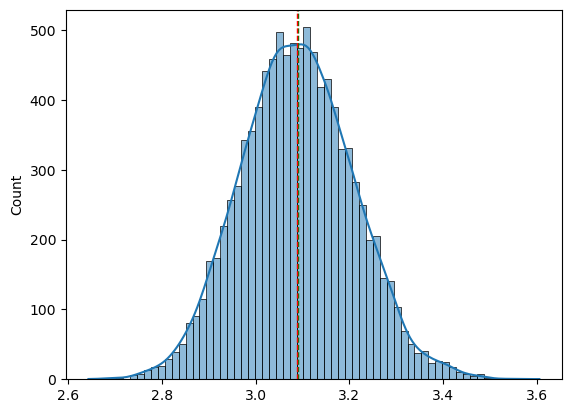

In [5]:

# Traditional bootstrap for men tips
n_samples = 10000

bootstrap_means = np.array([men.sample(len(men), replace= True).mean() for _ in range(n_samples)])


# Plot histogram
sns.histplot(bootstrap_means, kde=True)
plt.axvline(men.mean(), color="green", linestyle="--", linewidth=1)
plt.axvline(bootstrap_means.mean(), color="red", linestyle="--", linewidth=1)
plt.show()


In [6]:
# Bootstrap percentile interval
def percentile_interval(bootstrap_dist, loc=0.9):
    lower_limit = np.percentile(bootstrap_dist, (1 - loc) * 50)
    upper_limit = np.percentile(bootstrap_dist, 100 - (1 - loc) * 50)
    return lower_limit, upper_limit

In [7]:
print(percentile_interval(bootstrap_means, loc=0.9))

(2.8970668789808918, 3.2866910828025477)


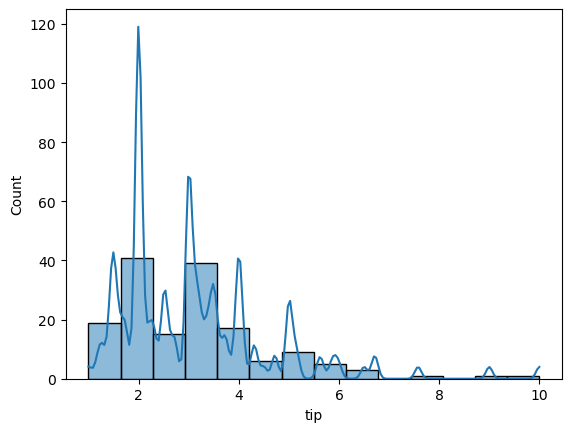

In [8]:
# Kernel density estimate
sns.histplot(men, kde=True, kde_kws={"bw_adjust": men.std() / np.sqrt(len(men))})
plt.show()


#### female tips

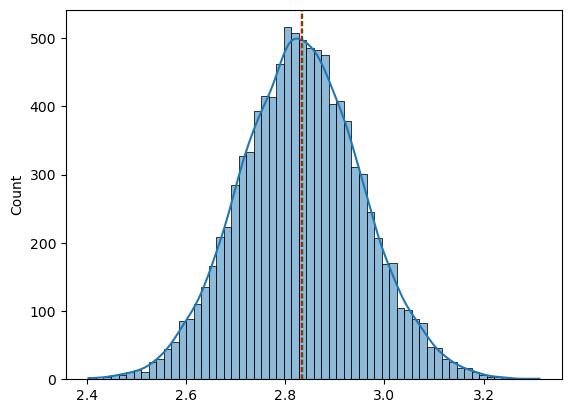

In [9]:

# Traditional bootstrap for female tips
n_samples = 10000

bootstrap_means_female = np.array([female.sample(len(female), replace= True).mean() for _ in range(n_samples)])


# Plot histogram
sns.histplot(bootstrap_means_female, kde=True)
plt.axvline(female.mean(), color="green", linestyle="--", linewidth=1)
plt.axvline(bootstrap_means_female.mean(), color="red", linestyle="--", linewidth=1)
plt.show()

In [10]:
print(percentile_interval(bootstrap_means_female, loc=0.9))

(2.6312586206896547, 3.036551724137931)


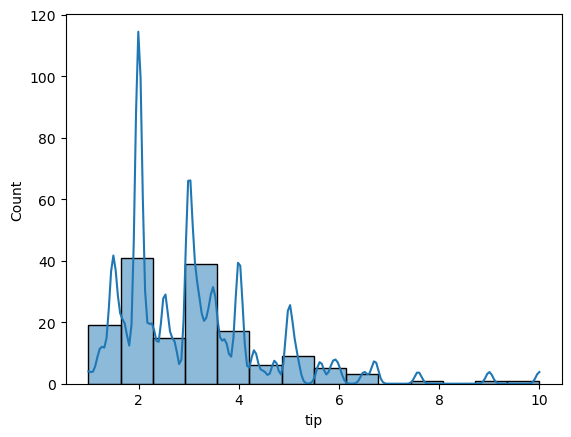

In [11]:
# Kernel density estimate
sns.histplot(men, kde=True, kde_kws={"bw_adjust": female.std() / np.sqrt(len(female))})
plt.show()